In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px
from matplotlib import cm
import matplotlib as mpl
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy
import random
import sklearn
import xarray as xr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn import tree
from sklearn.model_selection import cross_validate
import geopandas as gpd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from pathos.threading import ThreadPool as Pool
from sklearn import datasets, linear_model
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")
out_dir=Path("/mnt/u/LSM root zone/global_sr/output")
fig_dir=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/global_SR/global_sr_paper/figures')

## COMPARISON LAN STOCKER

In [11]:
cmap = cm.get_cmap('viridis')

### STOCKER SR

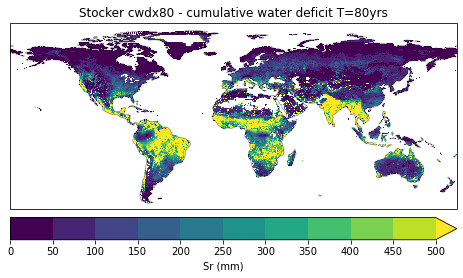

In [16]:
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80.nc')
s = s.cwdx80

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = s.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Stocker cwdx80 - cumulative water deficit T=80yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_stocker_cwdx80.jpg',bbox_inches='tight',dpi=300)


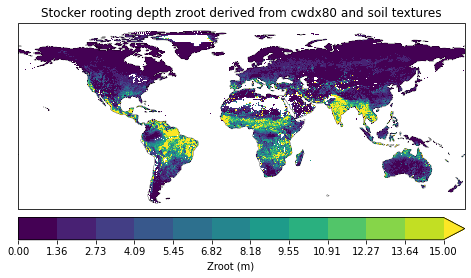

In [15]:
sd = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/zroot_cwd80.nc')
sd = sd.zroot_cwd80/1000 #convert to meters

lvls = np.linspace(0,15,12) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = sd.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Zroot (m)', pad=0.02, ticks = lvls)
ax.set_title(f'Stocker rooting depth zroot derived from cwdx80 and soil textures')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_stocker_zroot_cwd80.jpg',bbox_inches='tight',dpi=300)

### LAN SR

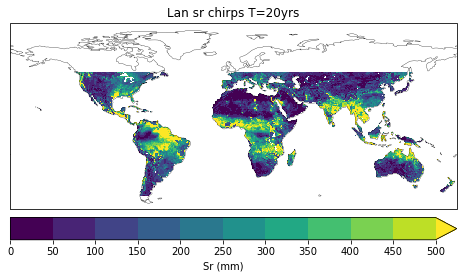

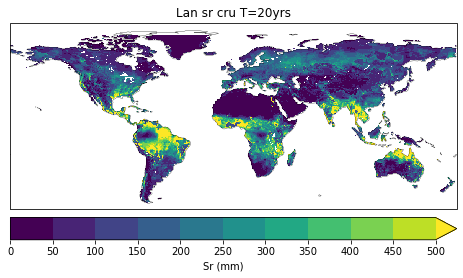

In [17]:
# chirps T20
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_20yrs.nc')
l = l.sr_chirps_20yrs[0]

lvls = np.arange(0,550,50)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps T=20yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_20yrs.jpg',bbox_inches='tight',dpi=300)

# cru T20
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_20yrs.nc')
l = l.sr_cru_20yrs[0]

lvls = np.arange(0,550,50) 
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru T=20yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_20yrs.jpg',bbox_inches='tight',dpi=300)


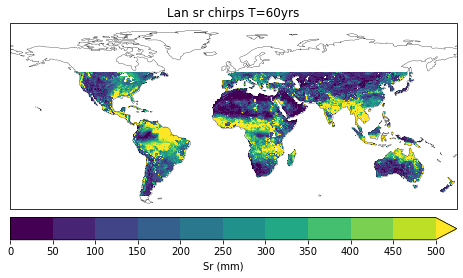

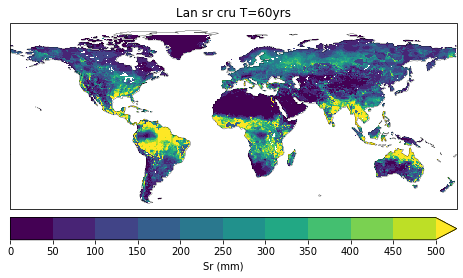

In [18]:
# chirps T60
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_60yrs.nc')
l = l.sr_chirps_60yrs[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps T=60yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_60yrs.jpg',bbox_inches='tight',dpi=300)

# cru T60
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_60yrs.nc')
l = l.sr_cru_60yrs[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru T=60yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_60yrs.jpg',bbox_inches='tight',dpi=300)


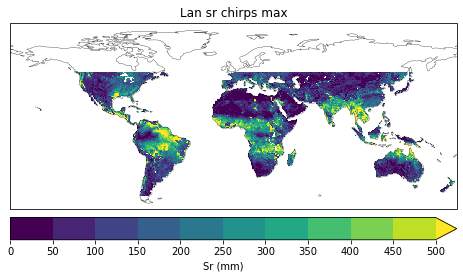

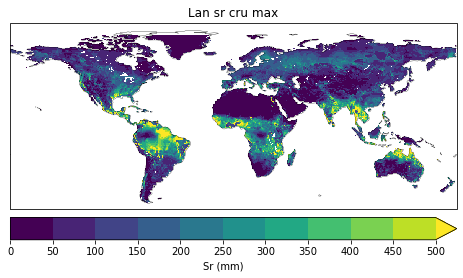

In [19]:
# chirps max
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_max.nc')
l = l.sr_chirps_max[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps max')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_max.jpg',bbox_inches='tight',dpi=300)

# cru max
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_max.nc')
l = l.sr_cru_max[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru max')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_max.jpg',bbox_inches='tight',dpi=300)


### SR COMPARISON

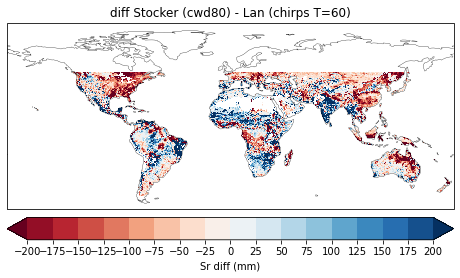

In [20]:
# diff lan-stocker
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_05grid.nc')
s = s.cwdx80

l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_60yrs.nc')
l = l.sr_chirps_60yrs[0]

d = s-l

lvls = np.linspace(-200,200,17) # scale W-E paper
cmapb = mpl.cm.RdBu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = d.plot(ax=ax, cmap=cmapb, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr diff (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'diff Stocker (cwd80) - Lan (chirps T=60)')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_diff_lan_chirps_60yrs_stocker_cwd80.jpg',bbox_inches='tight',dpi=300)


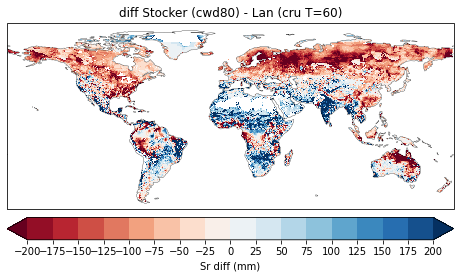

In [21]:
# diff lan-stocker
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_cru_grid.nc')
s = s.cwdx80

l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_60yrs.nc')
l = l.sr_cru_60yrs[0]

d = s-l

lvls = np.linspace(-200,200,17) # scale W-E paper
cmapb = mpl.cm.RdBu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = d.plot(ax=ax, cmap=cmapb, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr diff (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'diff Stocker (cwd80) - Lan (cru T=60)')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_diff_lan_cru_60yrs_stocker_cwd80.jpg',bbox_inches='tight',dpi=300)


### COMPARE POINT ESTIMATES

In [82]:
#Europe
lat_min_e, lat_max_e = 35,75 # 36,46 only spain cluster
lon_min_e, lon_max_e = -12,29 # -10,5 only spain cluster

#Asia
lat_min_a, lat_max_a = 1,26
lon_min_a, lon_max_a = 68,105

#us
lat_min_u, lat_max_u = 12,65
lon_min_u, lon_max_u = -132,-52

#south america
lat_min_s, lat_max_s = -32,-4
lon_min_s, lon_max_s = -60,-32

#south africa
lat_min_f, lat_max_f = -35.3,-19.3
lon_min_f, lon_max_f = 12,36

#australia
lat_min_t, lat_max_t = -40,-25
lon_min_t, lon_max_t = 140,155

In [83]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv'
df = pd.read_csv(f,index_col=0)
df = df[['sr_20','lon','lat']]
df = df.dropna()
cmap_vd2 = cmap

sr = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments_{data_sources}/sr_combined_gumbelfit_rzyear_{data_sources}.csv', index_col=0)
df['sr_80'] = sr['80.0']

rf = pd.read_csv(f'{work_dir}/output/regression/rf_results_modelb_combined_test.csv',index_col=0)
df['rf_sr'] = rf['Sr_p']
df = df.dropna()

ls = pd.read_csv(f'{work_dir}/output/sr_calculation/stocker_lan_sr_df.csv',index_col=0)
df[ls.columns] = ls[ls.columns]

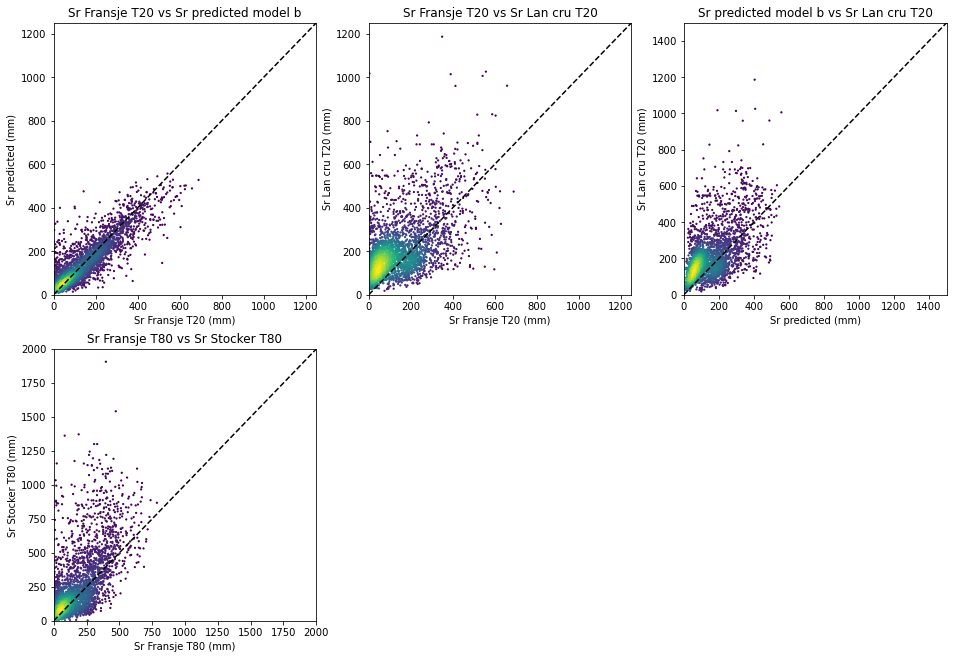

In [94]:
fig = plt.figure(figsize=(16,11))
ax = fig.add_subplot(231)
x = df['sr_20']
y = df['rf_sr']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1250)
ax.set_ylim(0,1250)
ax.set_xlabel('Sr Fransje T20 (mm)')
ax.set_ylabel('Sr predicted (mm)')
ax.set_title('Sr Fransje T20 vs Sr predicted model b')

ax = fig.add_subplot(232)
x = df['sr_20']
y = df['lan_cru_20yrs']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1250)
ax.set_ylim(0,1250)
ax.set_xlabel('Sr Fransje T20 (mm)')
ax.set_ylabel('Sr Lan cru T20 (mm)')
ax.set_title('Sr Fransje T20 vs Sr Lan cru T20')

ax = fig.add_subplot(233)
x = df['rf_sr']
y = df['lan_cru_20yrs']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1500)
ax.set_ylim(0,1500)
ax.set_xlabel('Sr predicted (mm)')
ax.set_ylabel('Sr Lan cru T20 (mm)')
ax.set_title('Sr predicted model b vs Sr Lan cru T20')

ax = fig.add_subplot(234)
x = df['sr_80']
y = df['stocker_cwd80x_mm']
x = x.dropna()
y = y[x.index]
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,2000)
ax.set_ylim(0,2000)
ax.set_xlabel('Sr Fransje T80 (mm)')
ax.set_ylabel('Sr Stocker T80 (mm)')
ax.set_title('Sr Fransje T80 vs Sr Stocker T80')

# ax = fig.add_subplot(234)
# x = df['lan_cru_60yrs']
# y = df['stocker_cwd80x_mm']
# x = x.dropna()
# y = y[x.index]
# y =  y.dropna()
# x = x[y.index]
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# ax.scatter(x,y,c=z,s=1.5)
# ax.plot([0,2000],[0,2000],'k--')
# ax.set_xlim(0,2000)
# ax.set_ylim(0,2000)
# ax.set_xlabel('Sr Lan cru T60 (mm)')
# ax.set_ylabel('Sr Stocker T80 (mm)')
# ax.set_title('Sr Lan cru T60 vs Sr Stocker T80')

# ax = fig.add_subplot(235)
# x = df['lan_chirps_60yrs']
# y = df['stocker_cwd80x_mm']
# x = x.dropna()
# y = y[x.index]
# y =  y.dropna()
# x = x[y.index]
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# ax.scatter(x,y,c=z,s=1.5)
# ax.plot([0,2000],[0,2000],'k--')
# ax.set_xlim(0,2000)
# ax.set_ylim(0,2000)
# ax.set_xlabel('Sr Lan chirps T60 (mm)')
# ax.set_ylabel('Sr Stocker T80 (mm)')
# ax.set_title('Sr Lan chirps T60 vs Sr Stocker T80')
fig.savefig(f'{out_dir}/figures/sr_comparison/points/scatter_sr_comparison.jpg',bbox_inches='tight',dpi=300)


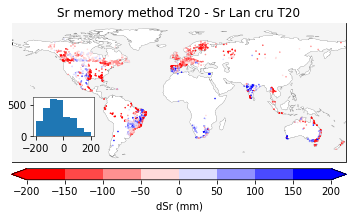

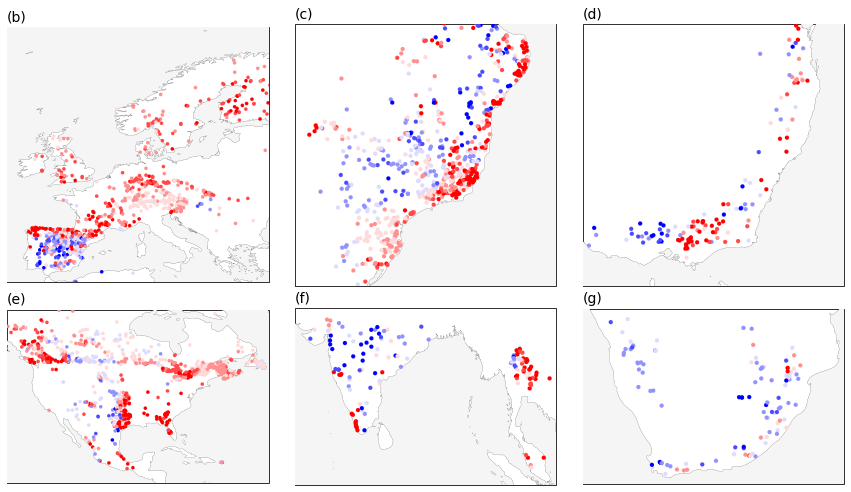

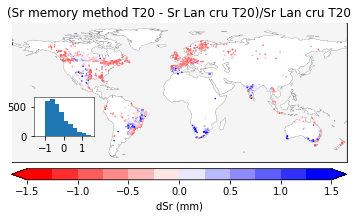

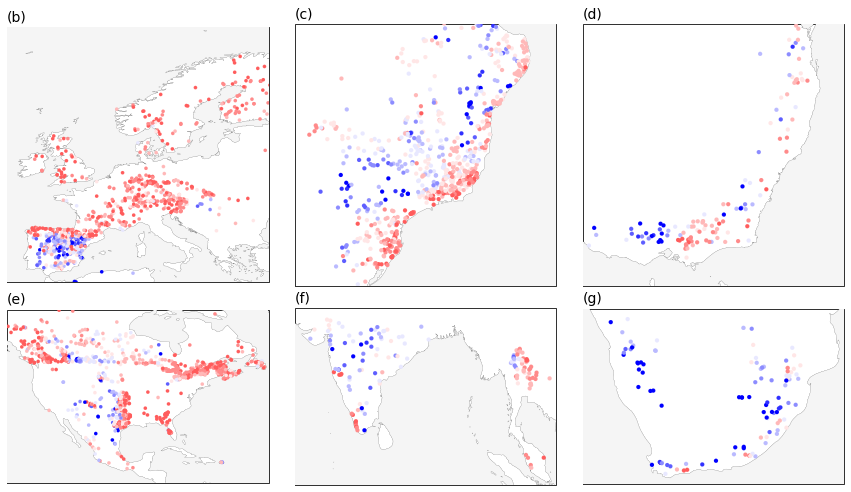

In [96]:
# sr memory method vs Lan cru T20 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-200,200,9)
bounds2 = np.linspace(-200,200,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['sr_20']-df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr memory method T20 - Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr memory method vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['sr_20']-df['lan_cru_20yrs'])/df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr memory method T20 - Sr Lan cru T20)/Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-rel_2.jpg',bbox_inches='tight',dpi=300)


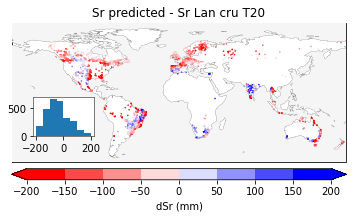

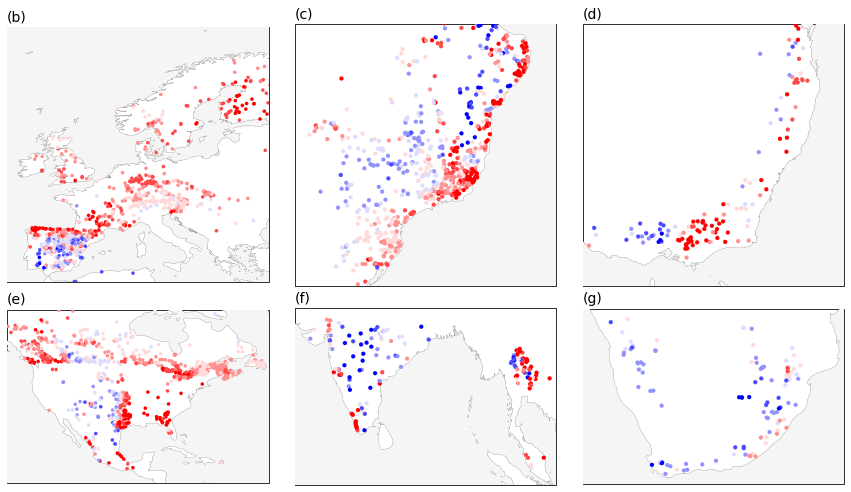

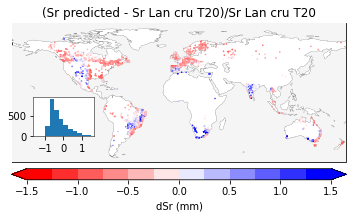

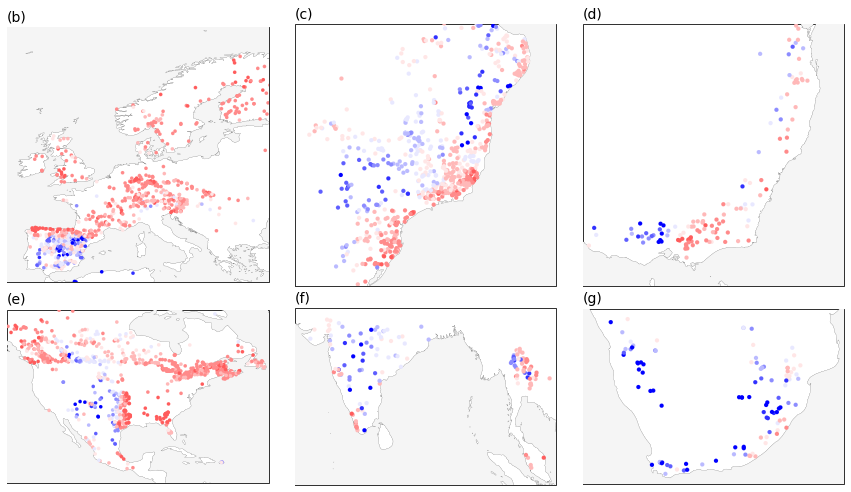

In [97]:
# sr predicted vs Lan cru T20 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-200,200,9)
bounds2 = np.linspace(-200,200,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['rf_sr']-df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr predicted - Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr predicted vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['rf_sr']-df['lan_cru_20yrs'])/df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr predicted - Sr Lan cru T20)/Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-rel_2.jpg',bbox_inches='tight',dpi=300)


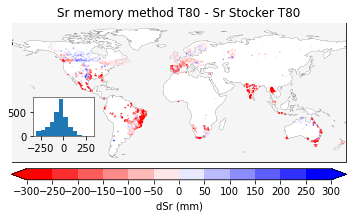

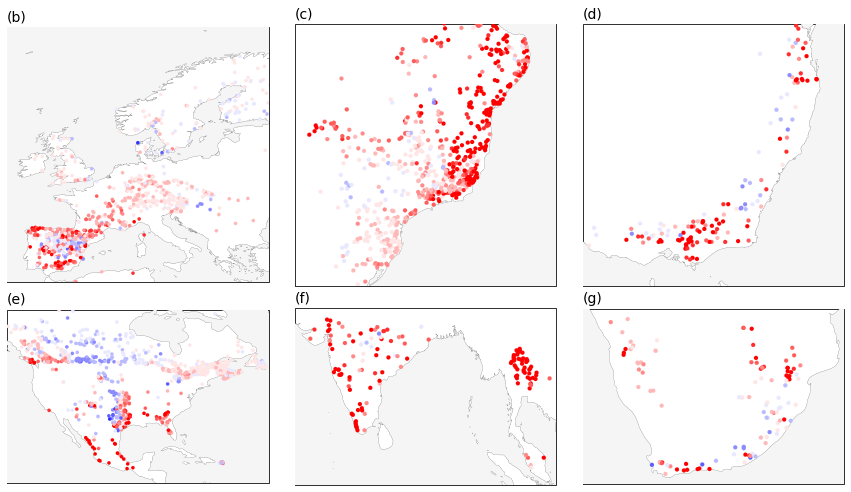

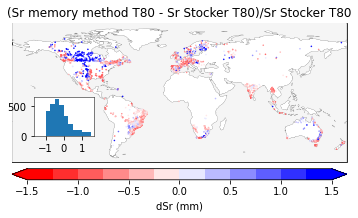

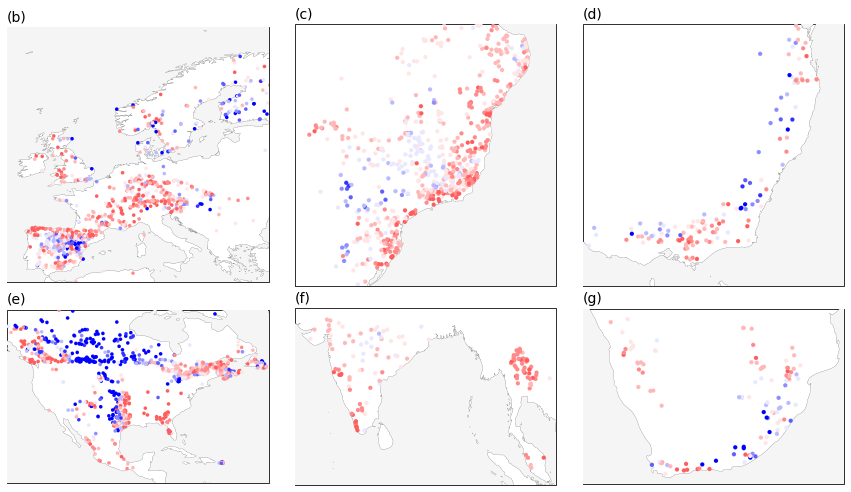

In [99]:
# sr memory method T80 vs Stocker T80 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-300,300,13)
bounds2 = np.linspace(-300,300,13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['sr_20']-df['stocker_cwd80x_mm']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr memory method T80 - Sr Stocker T80',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr memory method vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['sr_80']-df['stocker_cwd80x_mm'])/df['stocker_cwd80x_mm']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr memory method T80 - Sr Stocker T80)/Sr Stocker T80',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-rel_2.jpg',bbox_inches='tight',dpi=300)


## gridded variables

In [3]:
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_gswp3_land.nc')
t = xr.open_dataset(f'{work_dir}/output/gridded_sr/t_mean_gswp3_land.nc')
idu = xr.open_dataset(f'{work_dir}/output/gridded_sr/idu_mean_land.nc')
asi = xr.open_dataset(f'{work_dir}/output/gridded_sr/asi_land.nc')

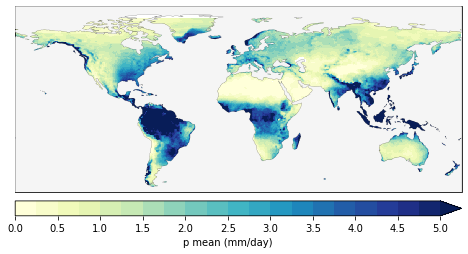

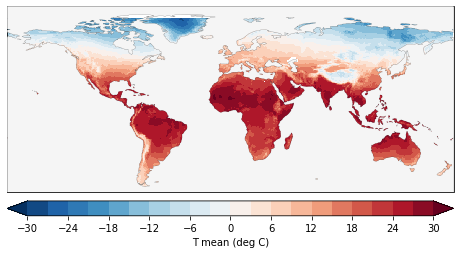

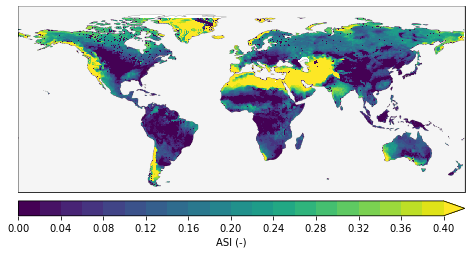

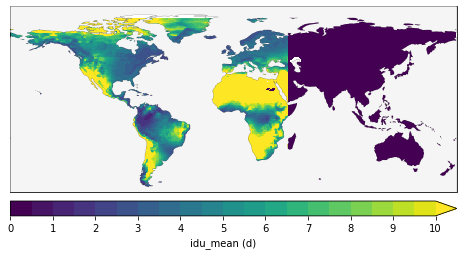

In [128]:
# p mean
lvls = np.linspace(0,5,21)
lvls2 = np.linspace(0,5,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = p.pr[0,:,:].plot(ax=ax, cmap='YlGnBu',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='p mean (mm/day)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)
ax.set_title('')
fig2.savefig(f'{out_dir}/gridded_sr/figures/p_mean.jpg',bbox_inches='tight',dpi=300)

# t mean
lvls = np.linspace(-30,30,21)
lvls2 = np.linspace(-30,30,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
t.tas[0,0,0] = -31
a = t.tas[0,:,:].plot(ax=ax, cmap='RdBu_r',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='T mean (deg C)',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=lvls2)
ax.set_title('')
fig2.savefig(f'{out_dir}/gridded_sr/figures/t_mean.jpg',bbox_inches='tight',dpi=300)

# asi
lvls = np.linspace(0,0.4,21)
lvls2 = np.linspace(0,0.4,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = asi.asi[:,:].plot(ax=ax, cmap='viridis',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='ASI (-)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)
fig2.savefig(f'{out_dir}/gridded_sr/figures/asi.jpg',bbox_inches='tight',dpi=300)

# idu mean
lvls = np.linspace(0,10,21)
lvls2 = np.linspace(0,10,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = idu.idu_mean[:,:].plot(ax=ax, cmap='viridis',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='idu_mean (d)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)
fig2.savefig(f'{out_dir}/gridded_sr/figures/idu_mean.jpg',bbox_inches='tight',dpi=300)


## Apply RF to gridded data

In [48]:
min_samples_leaf=1
max_depth=None
data_sources = 'gswp-p_gleam-ep_gswp-t'

In [49]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
df['catch_id'] = df.index
features = ['idu_mean','t_mean','asi','p_mean']
# features = ['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd']
sr_rp = 'sr_20'
ll = ['lat','lon','catch_id']
f = features + ll
dfx = df[f].values
dfy = df[sr_rp].values

# here split dataset into 'temp' and 'test'
cv_outer = 5 # the number of outer cross validations
sdf = pd.DataFrame(index=range(cv_outer), columns=['n_estimators','max_depth','min_samples_leaf','max_features','train_mae','train_r2_adj','test_mae','test_r2_adj','n_train','n_test','fold'])
l = []
train_dfs=[]
test_dfs=[]

kf = KFold(n_splits=cv_outer,shuffle=True,random_state=0)
df = dfy.reshape(-1, 1).ravel()
i=0
cv_train_ix = []
cv_test_ix = []
ddl = []
for train_ix, test_ix in kf.split(dfx):
    cv_train_ix.append(train_ix)
    cv_test_ix.append(test_ix)
    X = dfx[train_ix]
    y = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix] 
    
    # save lat lon columns
    lat_train = X[:,-3]
    lon_train = X[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X[:,-1]
    catch_id_test = X_test[:,-1]

    # remove lat lon catchid columns
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)  
    
    # run rf model with full 'temp' set and test set using the best inner cross validation
    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,max_depth=max_depth,min_samples_leaf=min_samples_leaf,oob_score=True)
    rf.fit(X,y)
    test_y_pred = rf.predict(X_test)
    train_y_pred = rf.predict(X)
    n_train,n_test = len(y),len(y_test)

    train_mae = np.round(mean_absolute_error(y, train_y_pred),2)
    # train_r2_adj =  np.round(r2_adj(y, train_y_pred,features),2)

    test_mae = np.round(mean_absolute_error(y_test, test_y_pred),2)
    # test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    
    perm_importance = permutation_importance(rf, X_test, y_test,scoring='neg_mean_absolute_error',random_state=42)
    # perm_importance = permutation_importance(rf, X_train, y_test,scoring='neg_mean_absolute_error',random_state=42)
    pi = perm_importance.importances_mean
    dd = pd.DataFrame(index=features,columns=['pi'])
    dd.pi = pi
    ddl.append(dd)
    
    df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_train['lat'] = lat_train
    df_train['lon'] = lon_train
    df_train['Sr_m'] = y
    df_train['Sr_p'] = train_y_pred
    df_train['Sr_p-Sr_m'] = train_y_pred - y
    df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y)/train_y_pred
    train_dfs.append(df_train)

    df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_test['lat'] = lat_test
    df_test['lon'] = lon_test
    df_test['Sr_m'] = y_test
    df_test['Sr_p'] = test_y_pred
    df_test['Sr_p-Sr_m'] = test_y_pred - y_test
    df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred
    test_dfs.append(df_test)

    # save scores in dataframe
    # sdf.loc[i][['n_estimators','max_depth','min_samples_leaf','max_features']] = [n_estimators,max_depth,min_samples_leaf,max_features]
    # sdf.loc[i]['fold'] = i
    # sdf.loc[i][['train_mae','train_r2_adj']] = [train_mae,train_r2_adj]
    # sdf.loc[i][['test_mae','test_r2_adj']] = [test_mae,test_r2_adj]
    # sdf.loc[i][['n_train','n_test']] = [n_train,n_test]
    # print(i)

    i+=1

# sdf.to_csv(f'{work_dir}/cross_validation/output/sdf_kinner{cv_inner}_kouter{cv_outer}_var{len(features)}_v2.csv')

In [51]:
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_gswp3_land.nc')
t = xr.open_dataset(f'{work_dir}/output/gridded_sr/t_mean_gswp3_land.nc')
idu = xr.open_dataset(f'{work_dir}/output/gridded_sr/idu_mean_land.nc')
asi = xr.open_dataset(f'{work_dir}/output/gridded_sr/asi_land.nc')

p_array = p.pr.to_numpy().flatten()
t_array = t.tas.to_numpy().flatten()
asi_array = asi.asi.to_numpy().flatten()
idu_array = idu.idu_mean.to_numpy().flatten()

lat_array = []
lon_array = []
for m in range(len(p.lat.values)):
    for n in range(len(p.lon.values)):
        lat_array.append(p.lat.values[m])
        lon_array.append(p.lon.values[n])

In [52]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
features = ['p_mean','t_mean', 'asi','idu_mean']
dfs=[]

for i in range(5):
    sr_rp = 'sr_20'
    df['catch_id'] = df.index
    ll = ['lat','lon','catch_id']
    f = features + ll
    dfx = df[f].values
    dfy = df[sr_rp].values
    train_ix = cv_train_ix[i]
    test_ix = cv_test_ix[i]

    # X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.3, random_state=42)
    X_train = dfx[train_ix]
    y_train = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix]

    # save lat lon columns
    lat_train = X_train[:,-3]
    lon_train = X_train[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X_train[:,-1]
    catch_id_test = X_test[:,-1]
    # remove lat lon columns
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)

    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    # rf = RandomForestRegressor(criterion='squared_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth,oob_score=True)
    rf = rf.fit(X_train, y_train)
    train_y_pred = rf.predict(X_train)
    
    dfg = pd.DataFrame(index=np.arange(0,195840,1), columns=['lat','lon','p_mean','t_mean','asi','idu_mean'])
    dfg.loc[:,'lat'] = lat_array
    dfg.loc[:,'lon'] = lon_array
    dfg.loc[:,'p_mean'] = p_array
    dfg.loc[:,'t_mean'] = t_array
    dfg.loc[:,'asi'] = asi_array
    dfg.loc[:,'idu_mean'] = idu_array
    dfg = dfg.dropna()
    
    dfx = dfg[features].values
    test_y_pred = rf.predict(dfx)
    dfg['sr_pred'] = test_y_pred
    dfs.append(dfg)

In [62]:
df0 = dfs[0]
df1 = dfs[1]
df2 = dfs[2]
df3 = dfs[3]
df4 = dfs[4]

In [91]:
dfp = pd.DataFrame(index=np.arange(0,195840,1), columns=['lat','lon','sr_p0','sr_p1','sr_p2','sr_p3','sr_p4'])
dfp.loc[:,'lat'] = lat_array
dfp.loc[:,'lon'] = lon_array
dfp['sr_p0'] = df0['sr_pred']
dfp['sr_p1'] = df1['sr_pred']
dfp['sr_p2'] = df2['sr_pred']
dfp['sr_p3'] = df3['sr_pred']
dfp['sr_p4'] = df4['sr_pred']
dfp['sr_p_mean'] = dfp[['sr_p0','sr_p1','sr_p2','sr_p3','sr_p4']].mean(axis=1)
dfp['sr_p_std'] = dfp[['sr_p0','sr_p1','sr_p2','sr_p3','sr_p4']].std(axis=1)
dfp['sr_p_sm'] = dfp['sr_p_std']/dfp['sr_p_mean']
dfp

,lat,lon,sr_p0,sr_p1,sr_p2,sr_p3,sr_p4,sr_p_mean,sr_p_std,sr_p_sm
0,80.0,-180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,80.0,-179.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,-179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80.0,-178.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80.0,-178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195835,-55.5,177.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195836,-55.5,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195837,-55.5,178.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195838,-55.5,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# dataframe to 2d xarray
# mean
srp = np.zeros([len(p.lat.values),len(p.lon.values)])
i=0
for n in range(len(p.lat.values)):
    for m in range(len(p.lon.values)):
        srp[n,m] = dfp['sr_p_mean'][i]
        i+=1
lon = p.lon.values
lat = p.lat.values
data_xr_mean = xr.DataArray(srp,
                       coords={'lat':lat,'lon':lon},
                       dims=['lat','lon'],
                       name='sr_p')

# std
srp = np.zeros([len(p.lat.values),len(p.lon.values)])
i=0
for n in range(len(p.lat.values)):
    for m in range(len(p.lon.values)):
        srp[n,m] = dfp['sr_p_std'][i]
        i+=1
lon = p.lon.values
lat = p.lat.values
data_xr_std = xr.DataArray(srp,
                       coords={'lat':lat,'lon':lon},
                       dims=['lat','lon'],
                       name='sr_p')

# std/mean
srp = np.zeros([len(p.lat.values),len(p.lon.values)])
i=0
for n in range(len(p.lat.values)):
    for m in range(len(p.lon.values)):
        srp[n,m] = dfp['sr_p_sm'][i]
        i+=1
lon = p.lon.values
lat = p.lat.values
data_xr_sm = xr.DataArray(srp,
                       coords={'lat':lat,'lon':lon},
                       dims=['lat','lon'],
                       name='sr_p')

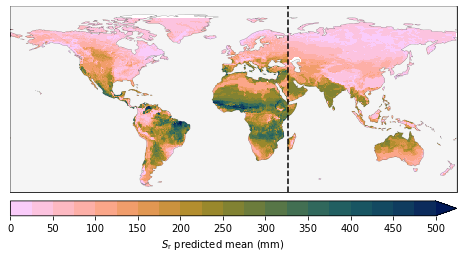

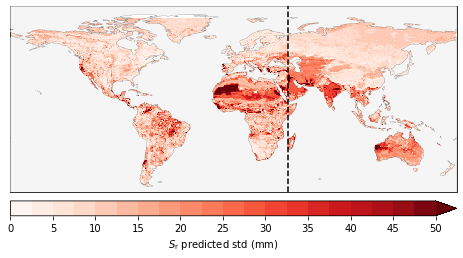

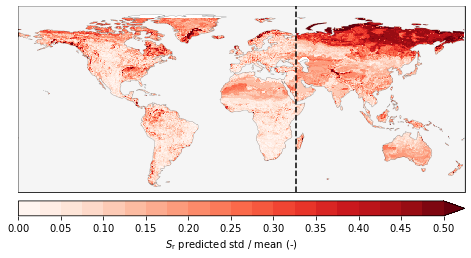

In [102]:
# sr predicted mean
from cmcrameri import cm
cmap_rdbu = cm.batlow_r
# cmap_rdbu = cm.get_cmap('viridis')
bounds = np.linspace(0, 500,21)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_mean[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_mean.jpg',bbox_inches='tight',dpi=300)

# standard deviation
from matplotlib import cm
cmap_rdbu = cm.get_cmap('Reds')
bounds = np.linspace(0,50,21)
bounds2 = np.linspace(0,50,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_std[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted std (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_std.jpg',bbox_inches='tight',dpi=300)


# relative standard deviation
bounds = np.linspace(0,0.5,21)
bounds2 = np.linspace(0,0.5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_sm[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted std / mean (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_std_mean.jpg',bbox_inches='tight',dpi=300)


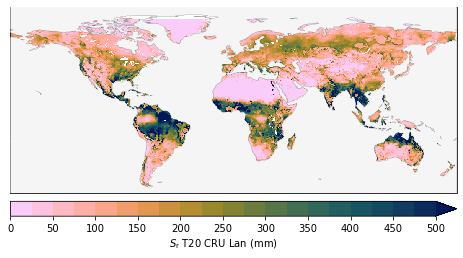

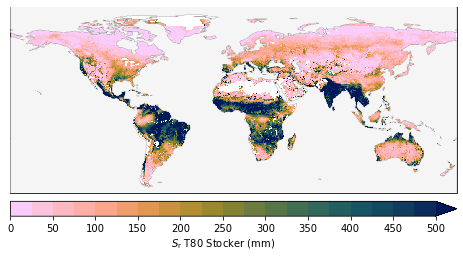

In [117]:
# sr reference
from cmcrameri import cm
cmap_rdbu = cm.batlow_r
# cmap_rdbu = cm.get_cmap('viridis')
bounds = np.linspace(0, 500,21)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

# cru T20 Lan
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_20yrs.nc')
l = l.sr_cru_20yrs[0]

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = l.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T20 CRU Lan (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_lan_t20.jpg',bbox_inches='tight',dpi=300)


# stocker T80
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_cru_grid.nc')
s = s.cwdx80
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = s.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T80 Stocker (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_stocker_t80.jpg',bbox_inches='tight',dpi=300)


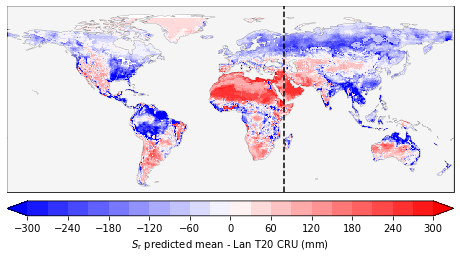

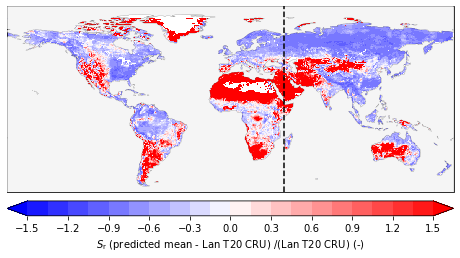

In [127]:
# sr differences
from matplotlib import cm

# lan vs predicted abs
cmap_rdbu = cm.get_cmap('bwr')
bounds = np.linspace(-300,300,21)
bounds2 = np.linspace(-300,300,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

lp = data_xr_mean[:,:]-l
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lp.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Lan T20 CRU (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_lan_abs.jpg',bbox_inches='tight',dpi=300)

# lan vs predicted rel
bounds = np.linspace(-1.5,1.5,21)
bounds2 = np.linspace(-1.5,1.5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)
lpr = (data_xr_mean[:,:]-l)/l
lpr[0,0]=-1.6
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpr.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ (predicted mean - Lan T20 CRU) /(Lan T20 CRU) (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_lan_rel.jpg',bbox_inches='tight',dpi=300)


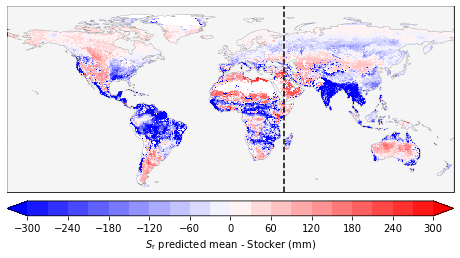

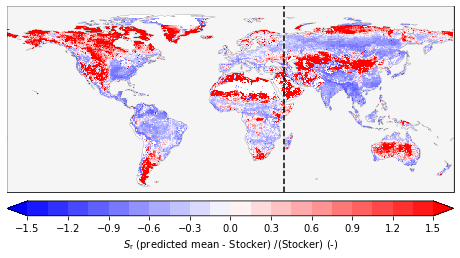

In [126]:
# stocker vs predicted abs
cmap_rdbu = cm.get_cmap('bwr')
bounds = np.linspace(-300,300,21)
bounds2 = np.linspace(-300,300,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

lp = data_xr_mean[:,:]-s
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lp.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Stocker (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_stocker_abs.jpg',bbox_inches='tight',dpi=300)

# lan vs predicted rel
bounds = np.linspace(-1.5,1.5,21)
bounds2 = np.linspace(-1.5,1.5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)
lpr = (data_xr_mean[:,:]-s)/s
lpr[0,0]=-1.6
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpr.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ (predicted mean - Stocker) /(Stocker) (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_stocker_rel.jpg',bbox_inches='tight',dpi=300)

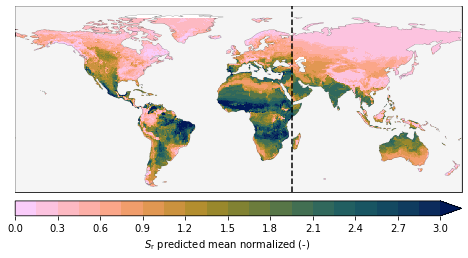

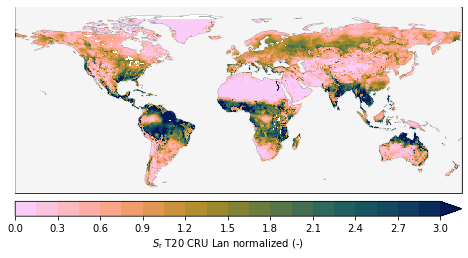

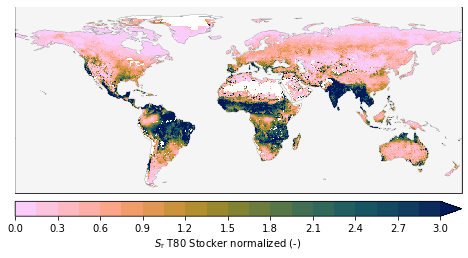

In [134]:
# NORMALIZED
data_xr_mean_n = data_xr_mean[:,:]/data_xr_mean.mean()
ln = l/l.mean()
sn = s/s.mean()

from cmcrameri import cm
cmap_rdbu = cm.batlow_r
# cmap_rdbu = cm.get_cmap('viridis')
bounds = np.linspace(0,3,21)
bounds2 = np.linspace(0,3,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_mean_n[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean normalized (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_mean_normalized.jpg',bbox_inches='tight',dpi=300)

# sr reference
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = ln.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T20 CRU Lan normalized (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_lan_t20_normalized.jpg',bbox_inches='tight',dpi=300)


# stocker T80
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = sn.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T80 Stocker normalized (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_stocker_t80_normalized.jpg',bbox_inches='tight',dpi=300)

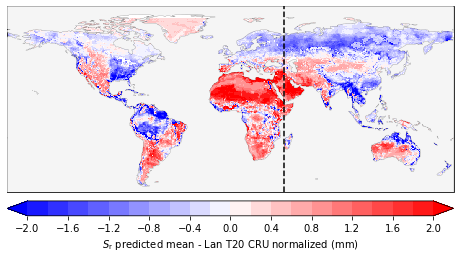

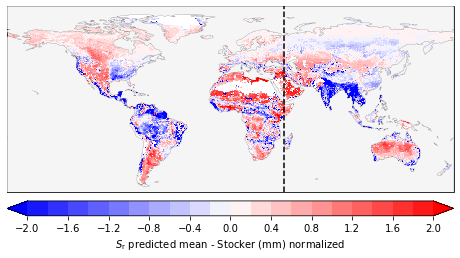

In [141]:
# normalized differences
from matplotlib import cm
# stocker vs predicted abs
cmap_rdbu = cm.get_cmap('bwr')
bounds = np.linspace(-2,2,21)
bounds2 = np.linspace(-2,2,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

lpn = data_xr_mean_n - ln
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpn.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Lan T20 CRU normalized (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_lan_abs_normalized.jpg',bbox_inches='tight',dpi=300)

lpn = data_xr_mean_n - sn
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpn.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
ax.plot([lon[447],lon[447]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Stocker (mm) normalized', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_stocker_abs_normalized.jpg',bbox_inches='tight',dpi=300)
